# Machine Learning Final Project
## TechWorks Consulting

### Tasks To do
1. Your views about the problem statement?
2. What will be your approach to solving this task?
3. What were the available ML model options you had to perform this task?
4. Which model’s performance is best and what could be the possible reason for that?
5. What steps can you take to improve this selected model’s performance even further?

## Task 1 Your views about the problem statement?
TechWorks Consulting is a consulting company that provide High Talent to the variety of businesses. 
It is important to companies to set competitive and fair salary to employees. We have to Create a machine 
learning model which will help the company to recriute top notch high level talent.

## Task 2 What will be your approach to solving this task?
For making a Project I follow some steps
1. Load Important Libraries
2. Load the all 3 CSV file into the Machine
3. View The Data
4. Function to assign tier labels and city to numerical data 1 for Metro cities and 0 for Non-Metro cities
5. Creating Dummies for Tier and Role fields. and then view again the data by df and EDA
6. Checking Null values
7. Identify Outliers using percentile method and compare them and then treat them and Graphs to visual the data (Make Scatter plot)
8. Training and tesing the data
9. Use of Different Models (LINEAR REGRESSION MODEL, RIDGE REGRESSION, LASSO REGRESSION, DECISION TREE REGRESSION, RANDOM FOREST REGRESSOR, XG BOOST, BAGGING REGRESSOR)

## Task 3 What were the available ML model options you had to perform this task?
1. LINEAR REGRESSION MODEL- Current CTC. We have to find out salary predictions
2. Multiple Linear Regression Model and fit the data. Predictiong the values  by X_train and y_train and calculate the R-Square and mean square method.
3. satsmodels api for the estimation of many different statistical models
4. RIDGE REGRESSION- training and testing the model. load the Sklearn and import ridge. visualize the data unsing scatterplot
5. LASSO REGRESSION- To remove any influence on salary predictions. Define the range of alfa values (-2,8,100). Train and Test the data
6. DECISION TREE REGRESSION- Make a graph like tree to overview the salary predictions
7. RANDOM FOREST REGRESSOR- It combine multiple decision trees and get more accurate predictions
8. XG BOOST- A boosting model used for high accuracy
9. BAGGING REGRESSOR- Uses multiple decision trees for enchace high prediction value

### Task 4 Which model’s performance is best and what could be the possible reason for that?

######  Linear Regression:

R-squared (R^2) - Train: 0.5335, Test: 0.5367
Mean Squared Error (MSE) - Train: 75026071.4080, Test: 68751323.9296

######  Ridge Regression:

R-squared (R^2) - Train: 0.5335, Test: 0.5366
Mean Squared Error (MSE) - Train: 75028518.5878, Test: 68763923.8062


######  Lasso Regression:

R-squared (R^2) - Train: 0.5332, Test: 0.5374
Mean Squared Error (MSE) - Train: 75080196.9627, Test: 68643390.1817


######  Decision Tree Regression:

R-squared (R^2) - Train: 0.6137, Test: 0.5928
Mean Squared Error (MSE) - Train: 62125086.3121, Test: 60424631.0261

######  Decision Tree Regression with GridSearchCV:

R-squared (R2) for Training Data: 0.6397831325660944
R-squared (R2) for Testing Data: 0.603220439065417
Mean Squared Error (MSE) for Training Data: 57933285.64360235
Mean Squared Error (MSE) for Testing Data: 58875901.69009934

######  Random Forest Regressor:

R-squared (R2) for Training Data: 0.8943591545736076
R-squared (R2) for Testing Data: 0.581370202634188
Mean Squared Error (MSE) for Training Data: 17272051.591172855
Mean Squared Error (MSE) for Testing Data: 60068085.895809144

######  XG Boost Regressor:

R-squared (R2) for Training Data: 0.6531205659875161
R-squared (R2) for Testing Data: 0.5930683308017327
Mean Squared Error (MSE) for Training Data: 56714043.28503834
Mean Squared Error (MSE) for Testing Data: 58389552.327463485

######  Bagging Regressor:

R-squared (R2) for Training Data: 0.9452423921939579
R-squared (R2) for Testing Data: 0.5928202372696956
Mean Squared Error (MSE) for Training Data: 8952751.40233669
Mean Squared Error (MSE) for Testing Data: 58425150.61427052


The Bagging Regressor is the best performer for predicting the target variable with a accuracy of 94.5% of Training data and 59.2% of Testing data


#### Conclusion
In conclusion, I using the Bagging Regressor Regressor for your predictive tasks due to its high prediction accuracy.

### Task 5 What steps can you take to improve this selected model’s performance even further?

Firstly the make a Validation Curve for Ridge and Lasso Regression
To further enhance the performance of the selected model some steps should be follow:
For Ridge regression, I used a validation curve to explore different values of alpha(10.72).
For Lasso curve similar curve shoulb be applied
XG Boost Regressor was optimized with a learning rate of 0.1, max depth of 4, and 100 estimators.
Use of hyperparameters to increase its accuracy in predictions.

#### Conclusion:
 For the high accuracy I using the Begging Regressor with for your predictive tasks.

# Execution

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from tabulate import tabulate
from colorama import Fore, Style

# some libraries may be needed as I make project Further should be execute as down as per need
# pip was install already in my pc

In [3]:
# Uploding CSV file from system

df = pd.read_csv('E:/internshala/4 Python and Machine learning/Project/ML case Study.csv', header = 0)
city_data_df= pd.read_csv('E:/internshala/4 Python and Machine learning/Project/cities.csv', header = 0)
college_data_df = pd.read_csv('E:/internshala/4 Python and Machine learning/Project/Colleges.csv', header = 0)

### View Data

In [4]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09


In [5]:
city_data_df

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [6]:
college_data_df 

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


In [7]:
# Function to assign tier labels to colleges based on 'college_data_df'.

def assign_tier(row):
    if row['College'] in college_data_df['Tier 1'].values:
        return 'Tier 1'
    elif row['College'] in college_data_df['Tier 2'].values:
        return 'Tier 2'
    elif row['College'] in college_data_df['Tier 3'].values:
        return 'Tier 3'
    else:
        return 'Unknown'

In [8]:
# Function to assign a city type (metro or non-metro) based on 'city_data_df'.

def assign_city(row):
    if row['City'] in city_data_df['Metrio City'].values:
        return 1
    elif row['City'] in city_data_df['non-metro cities'].values:
        return 0
    else:
        return 'unknown'

In [9]:
# Apply 'assign_city' function to create a 'metro_city' column in the 'df' dataframe.
df['metro_city'] = df.apply(assign_city, axis=1)

In [10]:
# Apply 'assign_tier' function to create a 'Tier' column in the 'df' dataframe.
df['Tier'] = df.apply(assign_tier, axis=1)

In [11]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,0,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,0,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,0,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,0,Tier 3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,0,Tier 1
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,1,Tier 1
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,0,Tier 1
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,1,Tier 1
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,0,Tier 1


In [12]:
#Create Dummies
df = pd.get_dummies(df, columns = ['Tier', 'Role'])

In [13]:
# Rename the tier columns to remove the 'Tier_' prefix
df = df.rename(columns={'Tier_Tier 1': 'Tier_1'})
df = df.rename(columns={'Tier_Tier 2': 'Tier_2'})
df = df.rename(columns={'Tier_Tier 3': 'Tier_3'})

In [14]:
# deleting unnecessary columns
del df['College']
del df['City']

In [15]:
# Convert boolean columns to integer (0 or 1) in the 'df' dataframe.
for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)

### Overview of Data at once

In [16]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,0,1,0,0,1
1,57081.0,1,84,18,68005.87,0,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,0,0,1,1,0
3,49010.0,2,81,33,82092.39,0,0,0,1,1,0
4,57879.0,4,74,32,73878.10,0,1,0,0,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   metro_city           1589 non-null   int64  
 6   Tier_1               1589 non-null   int32  
 7   Tier_2               1589 non-null   int32  
 8   Tier_3               1589 non-null   int32  
 9   Role_Executive       1589 non-null   int32  
 10  Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 105.6 KB


In [18]:
df.shape

(1589, 11)

In [19]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,0.363751,0.297042,0.339207,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.481230,0.457099,0.473589,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Null Values Checking

In [20]:
null_values = df.isna().sum()

In [21]:
print(null_values[null_values > 0])

Series([], dtype: int64)


#### Hence No Null Values defined

## Outliers

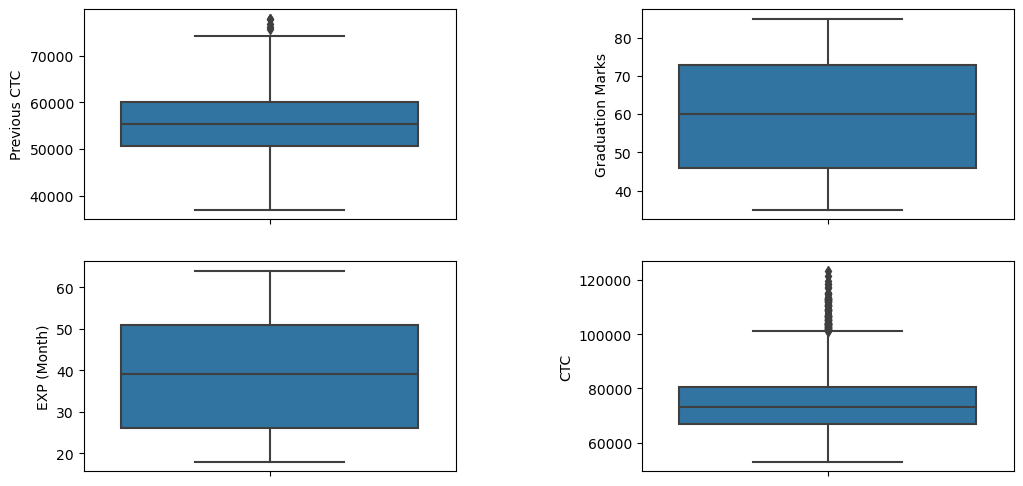

In [22]:
numerical_columns = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)

plt.show()

<Axes: xlabel='Previous CTC', ylabel='CTC'>

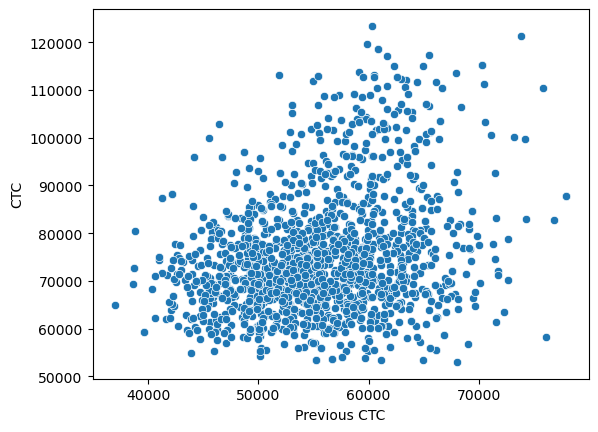

In [23]:
# scatter plot for previous CTC
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: xlabel='Previous job change', ylabel='CTC'>

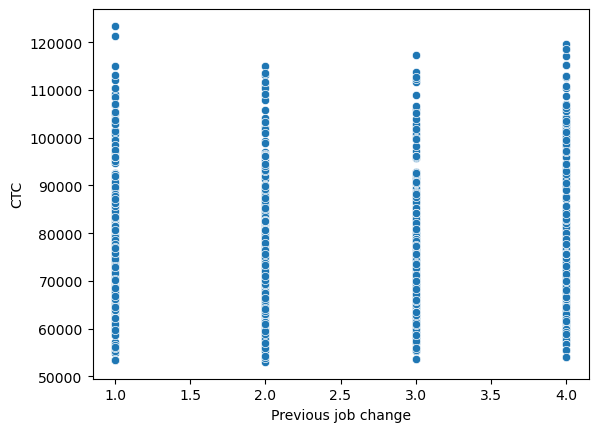

In [24]:
# scatter plot for previous Previous job change
sns.scatterplot(x = 'Previous job change', y = 'CTC', data = df)

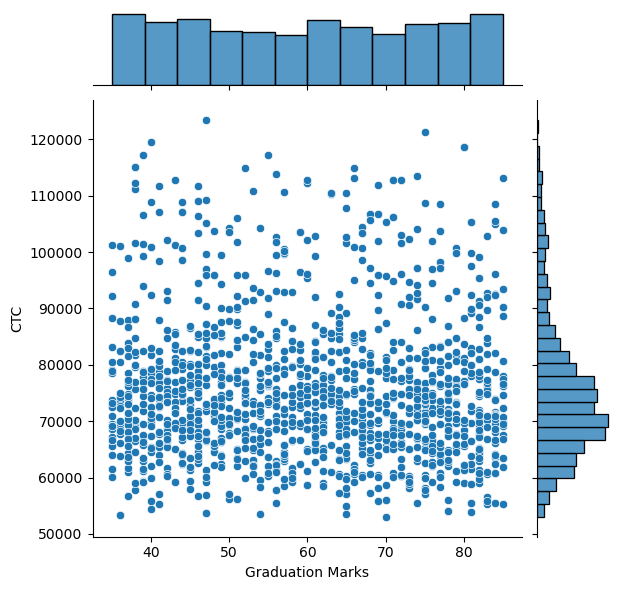

In [25]:
# scatter plot for previous Graduation Marks
sns.jointplot(x = df['Graduation Marks'], y= df['CTC'])

C:\Users\Daideepya Awadhiya\AppData\Local\Temp\ipykernel_16740\4070908615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'])


<Axes: xlabel='CTC', ylabel='Density'>

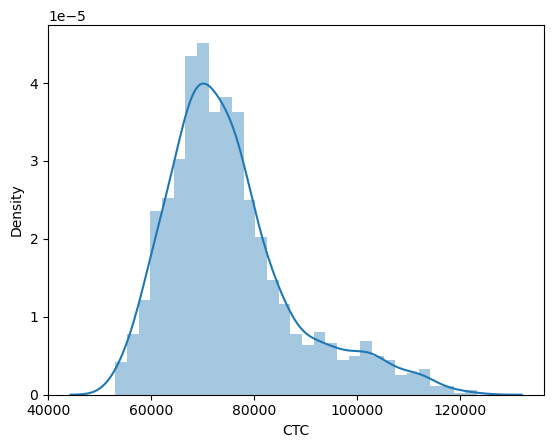

In [26]:
sns.distplot(df['CTC'])

In [27]:
# Calculate the 99th percentile value of the 'Previous CTC' column in the 'df' DataFrame.

upper_limit = np.percentile(df['Previous CTC'], [99])[0]

In [28]:
upper_limit

71506.92

In [29]:
#check values that highr then upper value

df[(df['Previous CTC'] > upper_limit)]

#there is many values that is higher then upper limit but it is in considerable range

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,1,0,0,1,1,0
292,74198.0,1,57,25,99644.51,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
572,71543.0,4,82,30,61366.78,1,1,0,0,1,0
701,71549.0,4,47,50,83116.21,0,0,1,0,1,0
847,71756.0,4,67,23,72141.43,1,1,0,0,1,0
860,75785.0,4,63,37,110338.25,1,1,0,0,0,1
941,72319.0,1,51,50,63538.43,1,0,0,1,1,0
1024,72661.0,3,74,47,70238.70,1,1,0,0,1,0
1047,73214.0,4,57,22,100119.53,0,1,0,0,0,1


In [30]:
#replace values that is higher then upper limit

df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit

C:\Users\Daideepya Awadhiya\AppData\Local\Temp\ipykernel_16740\2655405489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit


In [31]:
#upper limit for CTC

upper_limit2 = np.percentile(df['CTC'], [99])[0]

In [32]:
upper_limit2

112826.26

In [33]:
#check values that highr then upper value

df[(df['CTC'] > upper_limit2)]

#there is many values that is higher then upper limit but it is in considerable range

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
34,60894.0,4,80,28,118651.89,0,1,0,0,0,1
185,70258.0,4,38,36,115126.75,0,0,1,0,0,1
254,51912.0,2,66,50,113141.14,1,0,1,0,0,1
328,62264.0,2,52,64,114996.23,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
577,59101.0,3,56,31,113843.16,1,0,0,1,0,1
668,60476.0,1,85,62,113212.07,1,1,0,0,0,1
883,64930.0,1,66,51,114939.65,1,0,0,1,0,1
1146,61709.0,4,39,60,117207.24,1,1,0,0,0,1
1230,60298.0,1,47,52,123416.99,0,0,1,0,0,1


In [34]:
#replace values that is higher then upper limit

df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

C:\Users\Daideepya Awadhiya\AppData\Local\Temp\ipykernel_16740\3955326754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2


In [35]:
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.004644,-0.031366,-0.010947,0.042438,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.051670,0.045931,0.004271,-0.050794,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.005666,-0.018419,0.012021,-0.017858,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.023613,-0.003323,-0.014558,0.017427,0.026751,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.020365,0.019912,0.012346,-0.032149,-0.621311,0.621311
metro_city,0.004644,0.051670,-0.018616,-0.023613,-0.020365,1.000000,0.002135,0.022917,-0.024288,0.048671,-0.048671
Tier_1,-0.031366,0.045931,0.005666,-0.003323,0.019912,0.002135,1.000000,-0.491510,-0.541736,-0.015158,0.015158
Tier_2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,0.022917,-0.491510,1.000000,-0.465741,0.004865,-0.004865
Tier_3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.024288,-0.541736,-0.465741,1.000000,0.010706,-0.010706
Role_Executive,-0.012321,0.017150,-0.017858,0.026751,-0.621311,0.048671,-0.015158,0.004865,0.010706,1.000000,-1.000000


## Train-Test the Data

In [36]:
# Split the dataset into features (x_multi) and the target variable (y_multi)
x_multi = df.loc[:, df.columns != 'CTC']
y_multi = df['CTC']

In [37]:
# Split the data into training and testing sets with a 20% test size
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 0)

In [38]:
# Print the shapes of the training and testing sets to confirm the split
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 10) (318, 10) (1271,) (318,)


In [39]:
x_train

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
1062,61410.0,4,83,59,0,1,0,0,0,1
215,59781.0,1,46,41,1,1,0,0,1,0
654,62521.0,1,70,59,0,1,0,0,1,0
55,66624.0,1,63,58,0,1,0,0,0,1
1187,54621.0,2,52,62,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
763,54660.0,3,43,27,0,0,1,0,1,0
835,58049.0,2,51,42,1,1,0,0,1,0
1216,52744.0,4,80,40,1,0,0,1,1,0
559,56519.0,1,64,19,0,1,0,0,1,0


## Linear Regression Model

In [40]:
# Add a constant term to perform linear regression
x = sn.add_constant(df['EXP (Month)'])

# Create an Ordinary Least Squares (OLS) model and fit it to the data
lm = sn.OLS(df['CTC'], x).fit()

# Display a summary of the linear regression model, including statistics and coefficients.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.16e-34
Time:                        10:05:23   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

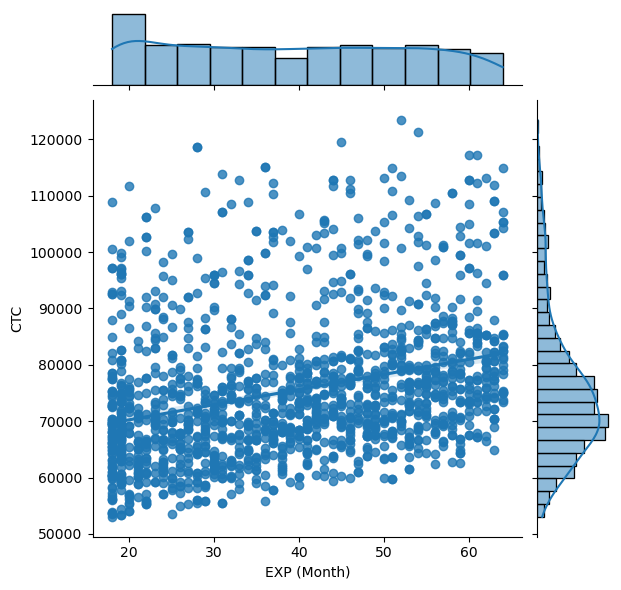

In [41]:
sns.jointplot(x=df['EXP (Month)'], y = df['CTC'], data = df, kind = 'reg')

#### Multiple linear Regression

In [42]:
# Create a Linear Regression model
lm_multi = LinearRegression()

In [43]:
# Fit the model to the training data
lm_multi.fit(x_train, y_train)

LinearRegression()

In [44]:
# Predicting values for the training and test datasets using a multiple linear regression model.
y_train_lm_multi = lm_multi.predict(x_train)
y_test_lm_multi = lm_multi.predict(x_test)

In [45]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_multi_train = r2_score(y_train, y_train_lm_multi)
r2_lm_multi_test = r2_score(y_test, y_test_lm_multi)

In [46]:
# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_multi_train = mean_squared_error(y_train, y_train_lm_multi)
mse_lm_multi_test = mean_squared_error(y_test, y_test_lm_multi)

In [47]:
#print the result
print(f"R-squared (R^2) - Train: {r2_lm_multi_train:.4f}, Test: {r2_lm_multi_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_multi_train:.4f}, Test: {mse_lm_multi_test:.4f}\n")

R-squared (R^2) - Train: 0.5335, Test: 0.5367
Mean Squared Error (MSE) - Train: 75026071.4080, Test: 68751323.9296



#### Statsmodel api

In [48]:
# Add a constant term to perform linear regression
x_const = sn.add_constant(x_multi)
# Create an Ordinary Least Squares (OLS) model and fit it to the data
lm = sn.OLS(y_multi, x_const).fit()

In [49]:
# Display a summary of the linear regression model, including statistics and coefficients.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.36e-256
Time:                        10:05:30   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1580   BIC:                         3.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.573e+04   1172.349     21.949      0.000    2.34e+04     2.8e+04
Previous CTC            0.4105      0.033     12.542      0.000       0.346       0.475
Previous job change   125.3208    192.846      0.650      0.516    -252.941     503.582
Graduation Marks        6.6007     14.501      0.455      0.649     -21.843      35.044
EXP (Month)           261.6302     15.458     16.925      0.000     231.309     291.951
metro_city            368.3233    433.465      0.850      0.396    -481.903    1218.550
Tier_1               8859.9552    487.502     18.174      0.000    7903.737    9816.174
Tier_2               8989.0489    499.819     17.985      0.000    8008.671    9969.426
Tier_3               7883.2689    503.244     15.665      0.000    6896.173    8870.365
Role_Executive       3121.2698    625.065      4.994      0.000    1895.226    4347.313
Role_Manager         2.261e+04    662.859     34.111      0.000    2.13e+04    2.39e+04
==============================================================================
Omnibus:                       48.290   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.258
Skew:                           0.405   Prob(JB):                     2.72e-12
Kurtosis:                       3.384   Cond. No.                     2.59e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.38e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Ridge Regression

In [50]:
# Standardize the data using StandardScaler from scikit-learn
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [52]:
# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

In [53]:
# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(
    Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='r2')

In [54]:
# Calculate mean R-squared scores for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

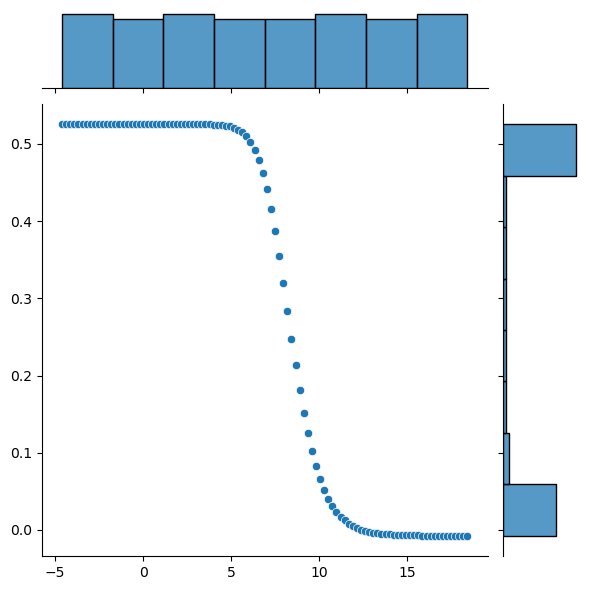

In [55]:
# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [56]:
# Find the alpha value with the highest validation R-squared
np.where(test_mean==max(test_mean))

# Train a Ridge regression model with the best alpha
lm_r_best = Ridge(alpha = param_range[30])
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=10.722672220103231)

#### Training and Testing the model

In [57]:
# Predicting values for the training and test datasets using a Ridge regression model with the best hyperparameters.
y_train_lm_r_best = lm_r_best.predict(x_train_s)
y_test_lm_r_best = lm_r_best.predict(x_test_s)

In [58]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_r_best_train = r2_score(y_train, y_train_lm_r_best)
r2_lm_r_best_test = r2_score(y_test, y_test_lm_r_best)

In [59]:
# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_r_best_train = mean_squared_error(y_train, y_train_lm_r_best)
mse_lm_r_best_test = mean_squared_error(y_test, y_test_lm_r_best)

In [60]:
# Print the results
print("Ridge Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_r_best_train:.4f}, Test: {r2_lm_r_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_r_best_train:.4f}, Test: {mse_lm_r_best_test:.4f}\n")

Ridge Regression:
R-squared (R^2) - Train: 0.5335, Test: 0.5366
Mean Squared Error (MSE) - Train: 75028518.5878, Test: 68763923.8062



## Lasso regression

In [61]:
# Define a range of alpha values for Lasso regression
param_range2 = np.logspace(-2,8,100)

In [62]:
# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_l, valid_score_l = validation_curve(Lasso(), x_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')

In [63]:
# Calculate mean R-squared scores for training and validation sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean(valid_score_l, axis=1)

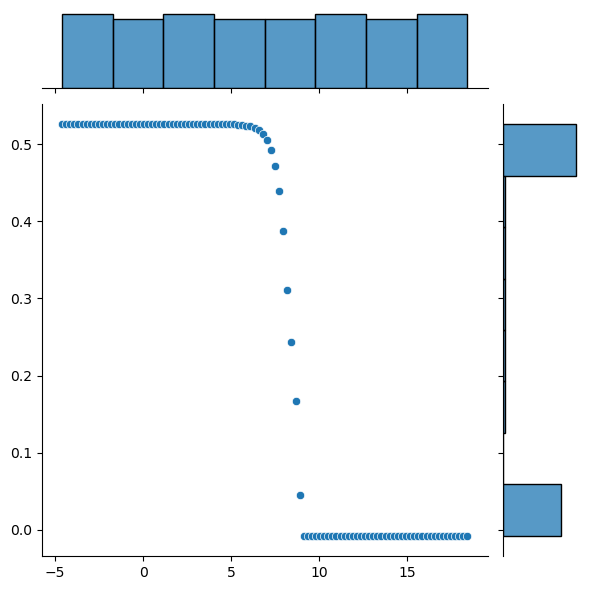

In [64]:
#Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range2), y=test_mean_l)

In [65]:
# Identify the alpha value with the highest R-squared
np.where(test_mean_l==max(test_mean_l))

(array([39], dtype=int64),)

In [66]:
# Train a Lasso regression model with the best alpha
lm_l_best = Lasso(alpha = param_range2[39])
lm_l_best.fit(x_train_s, y_train)

Lasso(alpha=86.97490026177834)

#### Training and Testing the Model

In [67]:
# Predicting values for the training and test datasets using a Lasso regression model with the best hyperparameters.
y_train_lm_l_best = lm_l_best.predict(x_train_s)
y_test_lm_l_best = lm_l_best.predict(x_test_s)

In [68]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_l_best_train = r2_score(y_train, y_train_lm_l_best)
r2_lm_l_best_test = r2_score(y_test, y_test_lm_l_best)

In [69]:
# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_l_best_train = mean_squared_error(y_train, y_train_lm_l_best)
mse_lm_l_best_test = mean_squared_error(y_test, y_test_lm_l_best)

In [70]:
# Print the results
print("Lasso Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_l_best_train:.4f}, Test: {r2_lm_l_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_l_best_train:.4f}, Test: {mse_lm_l_best_test:.4f}\n")

Lasso Regression:
R-squared (R^2) - Train: 0.5332, Test: 0.5374
Mean Squared Error (MSE) - Train: 75080196.9627, Test: 68643390.1817



## Decision Tree Regression

In [71]:
# Create a DecisionTreeRegressor with a maximum depth of 3 and fit it to the training data
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [72]:
# Predicting values for the training and test datasets using a regression tree model.
y_train_regtree = regtree.predict(x_train)
y_test_regtree = regtree.predict(x_test)

In [73]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_regtree_train = r2_score(y_train, y_train_regtree)
r2_regtree_test = r2_score(y_test, y_test_regtree)

In [74]:
# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_regtree_train = mean_squared_error(y_train, y_train_regtree)
mse_regtree_test = mean_squared_error(y_test, y_test_regtree)

In [75]:
# Print the results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_regtree_train:.4f}, Test: {r2_regtree_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_regtree_train:.4f}, Test: {mse_regtree_test:.4f}\n")

Decision Tree Regression:
R-squared (R^2) - Train: 0.6137, Test: 0.5928
Mean Squared Error (MSE) - Train: 62125086.3121, Test: 60424631.0261



In [76]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= x_train.columns, filled = True)

In [77]:
from IPython.display import Image

In [141]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pydotplus

In [79]:
# Export the decision tree as a graphical visualization
dot_data = tree.export_graphviz(regtree, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)

In [80]:
# Display the decision tree as an image
# Image(graph.create_png())

## Decision Tree Regression with GridSearchCV

In [170]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [171]:
pip install gradio

  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/a2/1b/5affc1b2dc6f5e677cf46f6a817c889a40939511ab6cf30747766381b757/gradio-4.19.1-py3-none-any.whl.metadata
  Using cached gradio-4.19.1-py3-none-any.whl.metadata (15 kB)
  Obtaining dependency information for altair<6.0,>=4.2.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Using cached altair-5.2.0-py3-none-any.whl.metadata (8.7 kB)
  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/bf/97/60351307ab4502908d29f64f2801a36709a3f1888447bb328bc373d6ca0e/fastapi-0.109.2-py3-none-any.whl.metadata
  Using cached fastapi-0.109.2-py3-none-any.whl.metadata (25 kB)
  Obtaining dependency information for gradio-client==0.10.0 from https://files.pythonhosted.org/packages/85/7c/956b96c8bd76ae19bf40ef477f7631336cc5728edbb3b4304f81e7a84e2a/gradio_client-0.10.0-py3-non

In [81]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 3, 4, 5],  # List of possible maximum depths
    'min_samples_split': [2,4, 5,6, 10],  # List of possible values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6,8]  # List of possible values for minimum samples required at a leaf node
}

In [82]:
# Create a DecisionTreeRegressor
regtree_gs = tree.DecisionTreeRegressor()

In [83]:
# Create the GridSearchCV object
grid_search = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [84]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 5, 6, 10]},
             scoring='neg_mean_squared_error')

In [85]:
# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [86]:
# Get the best estimator (DecisionTreeRegressor) with the best hyperparameters
best_regtree = grid_search.best_estimator_

In [87]:
# Use the best estimator to make predictions
y_train_pred = best_regtree.predict(x_train)
y_test_pred = best_regtree.predict(x_test)

In [88]:
# Calculate the R-squared scores for training data
r2_train_dt = r2_score(y_train, y_train_pred)

In [89]:
# Calculate the R-squared scores for testing data
r2_test_dt = r2_score(y_test, y_test_pred)

In [90]:
# Calculate the Mean Squared Error for training data
mse_train_dt = mean_squared_error(y_train, y_train_pred)

In [91]:
# Calculate the Mean Squared Error for testing data
mse_test_dt = mean_squared_error(y_test, y_test_pred)

In [92]:
# Print the results
print("R-squared (R2) for Training Data:", r2_train_dt)
print("R-squared (R2) for Testing Data:", r2_test_dt)
print("Mean Squared Error (MSE) for Training Data:", mse_train_dt)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_dt)

R-squared (R2) for Training Data: 0.6397831325660944
R-squared (R2) for Testing Data: 0.603220439065417
Mean Squared Error (MSE) for Training Data: 57933285.64360235
Mean Squared Error (MSE) for Testing Data: 58875901.69009934


## RandomForest Regressor

In [93]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100,  300],  # Number of trees in the forest
    'max_depth': [20, 30],  # Maximum depth of the trees
    'min_samples_split': [5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [ 2, 4]  # Minimum samples required at a leaf node
}

In [94]:
# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()

In [95]:
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [96]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300]},
             scoring='neg_mean_squared_error')

In [97]:
# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [98]:
# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf = grid_search.best_estimator_

In [99]:
# Use the best estimator to make predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

In [100]:
# Calculate the R-squared scores for training data
r2_train_rf = r2_score(y_train, y_train_pred)

In [101]:
# Calculate the R-squared scores for testing data
r2_test_rf = r2_score(y_test, y_test_pred)

In [102]:
# Calculate the Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)

In [103]:
# Calculate the Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred)

In [104]:
# Print the results
print("R-squared (R2) for Training Data:", r2_train_rf)
print("R-squared (R2) for Testing Data:", r2_test_rf)
print("Mean Squared Error (MSE) for Training Data:", mse_train_rf)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_rf)

R-squared (R2) for Training Data: 0.8966043830016768
R-squared (R2) for Testing Data: 0.6488437762624475
Mean Squared Error (MSE) for Training Data: 16629004.234399017
Mean Squared Error (MSE) for Testing Data: 52106109.644209474


In [105]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [106]:
# Define the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

In [107]:
# Fit the model on the training data
best_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

In [108]:
# Make predictions on training and testing sets
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

In [109]:
# Calculate R-squared scores for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [110]:
# Calculate Mean Squared Error for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [111]:
# Print the results
print("R-squared (R2) for Training Data:", r2_train)
print("R-squared (R2) for Testing Data:", r2_test)
print("Mean Squared Error (MSE) for Training Data:", mse_train)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)

R-squared (R2) for Training Data: 0.8943591545736076
R-squared (R2) for Testing Data: 0.581370202634188
Mean Squared Error (MSE) for Training Data: 17272051.591172855
Mean Squared Error (MSE) for Testing Data: 60068085.895809144


In [112]:
# Perform cross-validation to calculate training and validation scores
cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
cv_mse = -cross_val_score(best_rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [113]:
# Calculate mean R-squared and MSE for cross-validation
mean_cv_r2 = cv_scores.mean()
mean_cv_mse = cv_mse.mean()

In [114]:
# Print cross-validation results
print("Mean R-squared (R2) for Cross-Validation:", mean_cv_r2)
print("Mean Mean Squared Error (MSE) for Cross-Validation:", mean_cv_mse)

Mean R-squared (R2) for Cross-Validation: 0.5987962996021439
Mean Mean Squared Error (MSE) for Cross-Validation: 64935918.785701096


## XG Boost Regressor

In [115]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
}

In [116]:
# Create an XGBRegressor
xgb_gs = XGBRegressor()

In [117]:
# Create the GridSearchCV object with R2 scoring
grid_search = GridSearchCV(xgb_gs, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [118]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [119]:
# Print the best hyperparameters and corresponding R-squared
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}


In [120]:
best_xgb_param = grid_search.best_params_
# Get the best estimator (XGBRegressor) with the best hyperparameters
best_xgb = grid_search.best_estimator_

In [121]:
# Use the best estimator to make predictions
y_train_pred = best_xgb.predict(x_train)
y_test_pred = best_xgb.predict(x_test)

In [122]:
# Calculate the R-squared scores for training data
r2_train_xgb = r2_score(y_train, y_train_pred)

In [123]:
# Calculate the R-squared scores for testing data
r2_test_xgb = r2_score(y_test, y_test_pred)

In [124]:
# Calculate the Mean Squared Error for training data
mse_train_xgb = mean_squared_error(y_train, y_train_pred)

In [125]:
# Calculate the Mean Squared Error for testing data
mse_test_xgb = mean_squared_error(y_test, y_test_pred)

In [126]:
# Print the results
print("R-squared (R2) for Training Data:", r2_train_xgb)
print("R-squared (R2) for Testing Data:", r2_test_xgb)
print("Mean Squared Error (MSE) for Training Data:", mse_train_xgb)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_xgb)

R-squared (R2) for Training Data: 0.6531205659875161
R-squared (R2) for Testing Data: 0.5930683308017327
Mean Squared Error (MSE) for Training Data: 56714043.28503834
Mean Squared Error (MSE) for Testing Data: 58389552.327463485


## Bagging Regressor

In [127]:
from sklearn.tree import DecisionTreeRegressor


In [128]:
# Create a base regression model
base_model = DecisionTreeRegressor()

In [129]:
# Create a BaggingRegressor with the base model
bagging_reg = BaggingRegressor(base_model, random_state=0)

In [130]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # List of possible numbers of base models
}

In [131]:
# Create the GridSearchCV object
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [132]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [133]:
# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'n_estimators': 200}


In [134]:
# Get the best estimator (BaggingRegressor) with the best hyperparameters
best_bagging_reg = grid_search.best_estimator_

In [135]:
# Use the best estimator to make predictions
y_train_pred = best_bagging_reg.predict(x_train)
y_test_pred = best_bagging_reg.predict(x_test)

In [136]:
# Calculate the R-squared scores for training data
r2_train_bagging_reg = r2_score(y_train, y_train_pred)

In [137]:
# Calculate the R-squared scores for testing data
r2_test_bagging_reg = r2_score(y_test, y_test_pred)

In [138]:
# Calculate the Mean Squared Error for training data
mse_train_bagging_reg = mean_squared_error(y_train, y_train_pred)
mse_test_bagging_reg = mean_squared_error(y_test, y_test_pred)

In [139]:
# Print the results
print("R-squared (R2) for Training Data:", r2_train_bagging_reg)
print("R-squared (R2) for Testing Data:", r2_test_bagging_reg)
print("Mean Squared Error (MSE) for Training Data:", mse_train_bagging_reg)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_bagging_reg)

R-squared (R2) for Training Data: 0.9452423921939579
R-squared (R2) for Testing Data: 0.5928202372696956
Mean Squared Error (MSE) for Training Data: 8952751.40233669
Mean Squared Error (MSE) for Testing Data: 58425150.61427052


# Model Completed .... THANKS